# 텐서플로 임포트

In [1]:
import tensorflow as tf
print(tf.__version__)

2.17.0


# MNIST dataset

In [2]:
# MNIST DATA
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print('train set: ', x_train.shape, y_train.shape)
print('test  set: ', x_test.shape, y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
train set:  (60000, 28, 28) (60000,)
test  set:  (10000, 28, 28) (10000,)


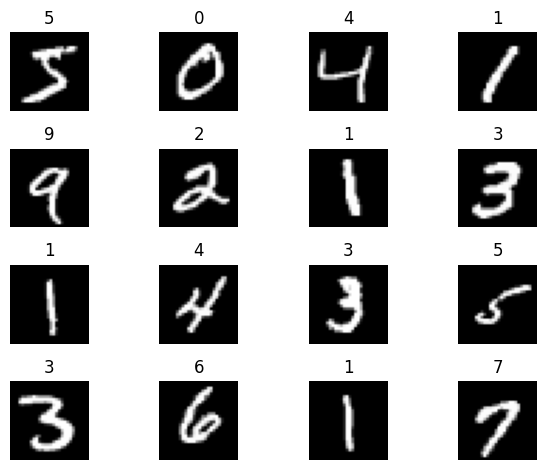

In [3]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(4, 4)
for i in range(16):
    ax = axes[i//4, i%4]
    ax.imshow(x_train[i], cmap='gray')
    ax.axis('off')
    ax.set_title(str(y_train[i]))
plt.tight_layout()
plt.show()

# 전처리

In [4]:
# 데이터 정규화
x_train = x_train / 255.
x_test = x_test / 255.

In [5]:
# Flatten
x_train = x_train.reshape(60000, -1)
print(x_train.shape)

(60000, 784)


In [6]:
x_test = x_test.reshape(10000, -1)
print(x_test.shape)

(10000, 784)


# Sequential API

In [7]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

seq_m = Sequential([
    Dense(64, activation='relu', input_shape=(784,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(10, activation='softmax'),
])

seq_m.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 56,810 (221.91 KB)

 Trainable params: 56,810 (221.91 KB)

 Non-trainable params: 0 (0.00 B)

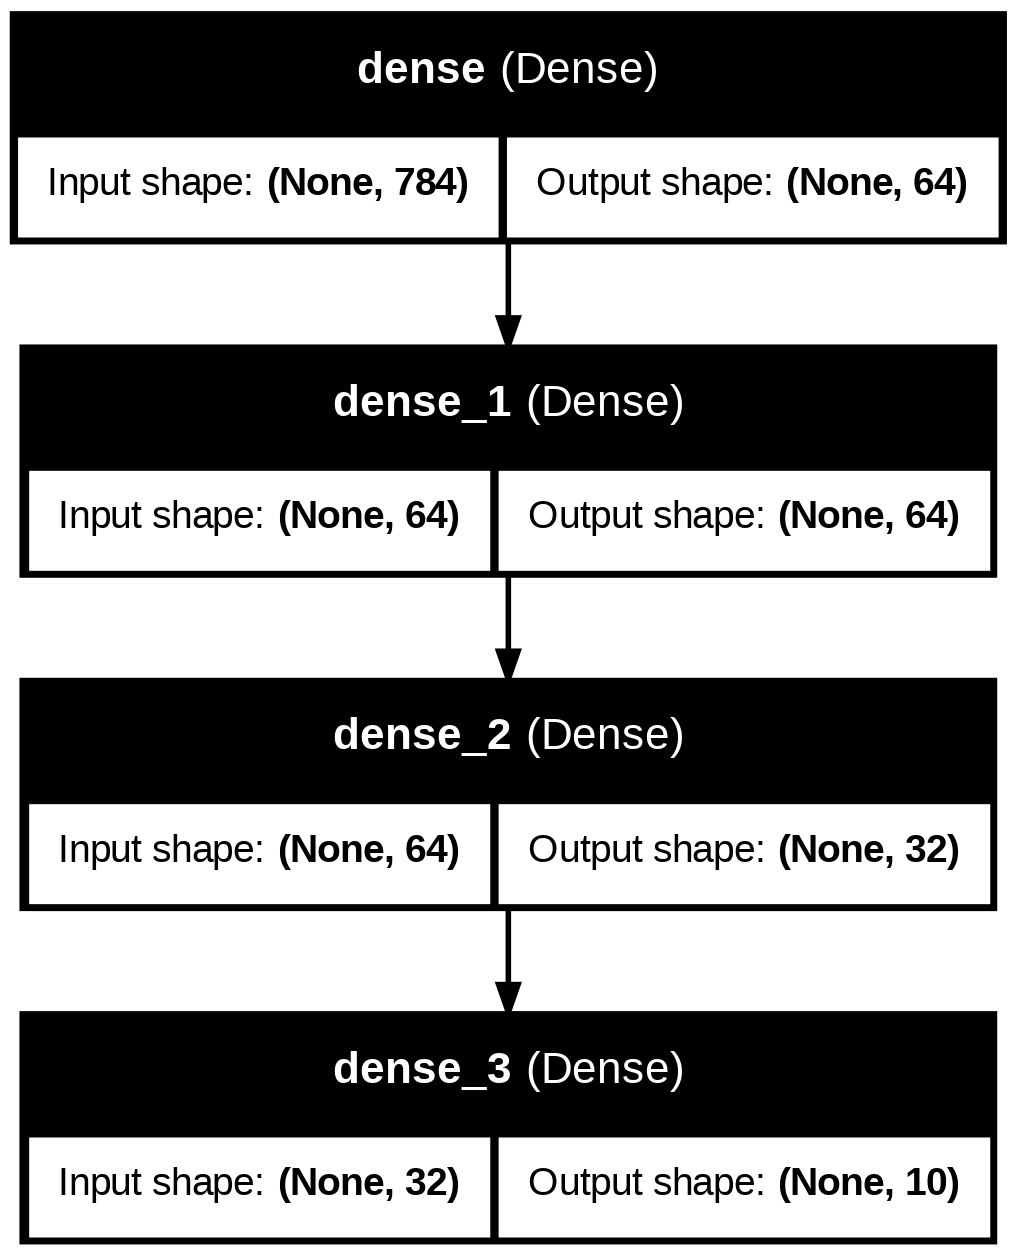

In [8]:
from tensorflow.keras.utils import plot_model
plot_model(seq_m, show_shapes=True, show_layer_names=True, to_file='sequence_api.png')

In [9]:
# 학습방법 설정
seq_m.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# 모델 학습/ 교차검증
history_seq = seq_m.fit(x_train, y_train,
                        validation_split=0.2,
                        #   validation_data=(x_test, y_test),
                        epochs=30,
                        batch_size=64,
                        )

Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7960 - loss: 0.6669 - val_accuracy: 0.9492 - val_loss: 0.1677
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9545 - loss: 0.1529 - val_accuracy: 0.9648 - val_loss: 0.1253
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9682 - loss: 0.1071 - val_accuracy: 0.9646 - val_loss: 0.1216
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9738 - loss: 0.0813 - val_accuracy: 0.9692 - val_loss: 0.1128
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9807 - loss: 0.0646 - val_accuracy: 0.9672 - val_loss: 0.1126
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9813 - loss: 0.0570 - val_accuracy: 0.9718 - val_loss: 0.1018
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9853 - loss: 0.0432 - val_accuracy: 0.9711 - val_loss: 0.1026
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9897 - loss: 0.0357 - val_accuracy: 0.

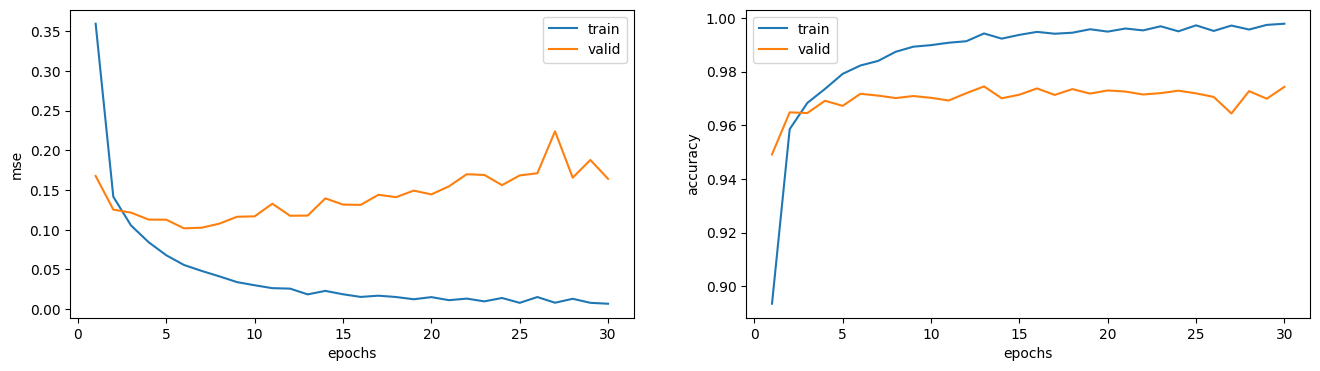

In [11]:
# history (로그 시각화)
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
axes[0].plot(range(1, 31),
         history_seq.history['loss'][0:30],
         label='train')
axes[0].plot(range(1, 31),
         history_seq.history['val_loss'][0:30],
         label='valid')
axes[0].set_xlabel('epochs')
axes[0].set_ylabel('mse')
axes[0].legend()

axes[1].plot(range(1, 31),
         history_seq.history['accuracy'][0:30],
         label='train')
axes[1].plot(range(1, 31),
         history_seq.history['val_accuracy'][0:30],
         label='valid')
axes[1].set_xlabel('epochs')
axes[1].set_ylabel('accuracy')
axes[1].legend()

plt.show()

# 함수형 API

In [12]:
from tensorflow.keras import Model, Input

# 모델 Input
inp = Input(shape=(784,), name='Input')

# 함수 형식의 체인 구조
h1 = Dense(256, activation='relu', name='hidden1')(inp)
h2 = Dense(256, activation='relu', name='hidden2')(h1)
h3 = Dense(64, activation='relu', name='hidden3')(h2)
h4 = Dense(32, activation='relu', name='hidden4')(h3)
out = Dense(10, activation='softmax', name='Output')(h4)

# 모델 생성 - 입력과 출력을 연결
func_m = Model(inputs=inp, outputs=out, name='func_m')
func_m.summary()

Model: "func_m"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Input (InputLayer)                   │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden1 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden2 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden3 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hidden4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 285,610 (1.09 MB)

 Trainable params: 285,610 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

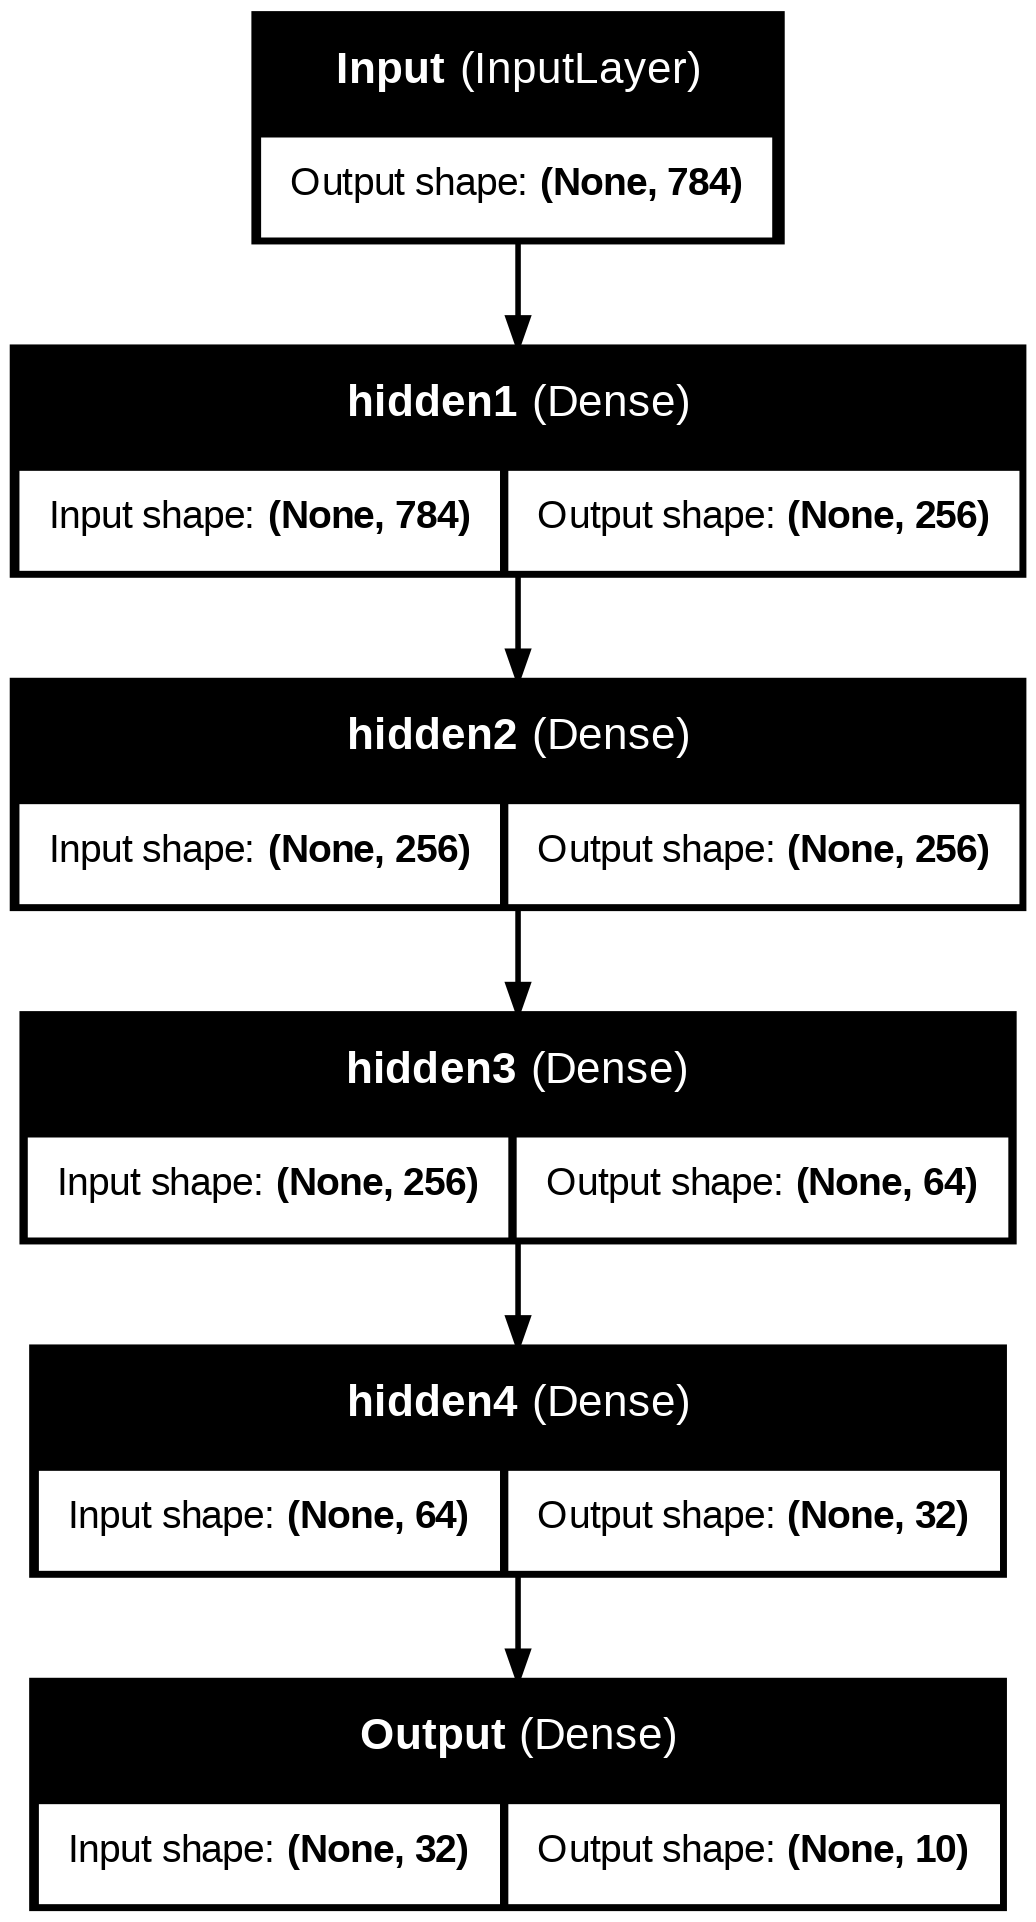

In [13]:
plot_model(func_m, show_shapes=True, show_layer_names=True, to_file='functional_api.png')

## 다중 출력

In [14]:
# 새로운 출력값 배열을 생성 (홀수: 1, 짝수: 0)
import numpy as np
y_train_new = np.where(y_train % 2 == 0, 0, 1)
y_test_new = np.where(y_test % 2 == 0, 0, 1)
y_train_new

array([1, 0, 0, ..., 1, 0, 0])

In [22]:
# Functional API를 사용하여 모델 생성

inp = Input(shape=(784,), name='input')

x = Dense(256, activation='relu')(inp)
x = Dense(256, activation='relu')(x)
x = Dense(64, activation='relu')(x)
odd_out = Dense(1, activation='sigmoid', name='odd_output')(x)

x = Dense(32, activation='relu')(x)
digit_out = Dense(10, activation='softmax', name='digit_output')(x)

multiout_m = Model(inputs=inp, outputs=[digit_out, odd_out], name='multiout_model')
multiout_m.summary()

Model: "multiout_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input (InputLayer)        │ (None, 784)            │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_12 (Dense)          │ (None, 256)            │        200,960 │ input[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_13 (Dense)          │ (None, 256)            │         65,792 │ dense_12[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_14 (Dense)          │ (None, 64)             │         16,448 │ dense_13[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_15 (Dense)          │ (None, 32)             │          2,080 │ dense_14[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ digit_output (Dense)      │ (None, 10)             │            330 │ dense_15[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ odd_output (Dense)        │ (None, 1)              │             65 │ dense_14[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 285,675 (1.09 MB)

 Trainable params: 285,675 (1.09 MB)

 Non-trainable params: 0 (0.00 B)

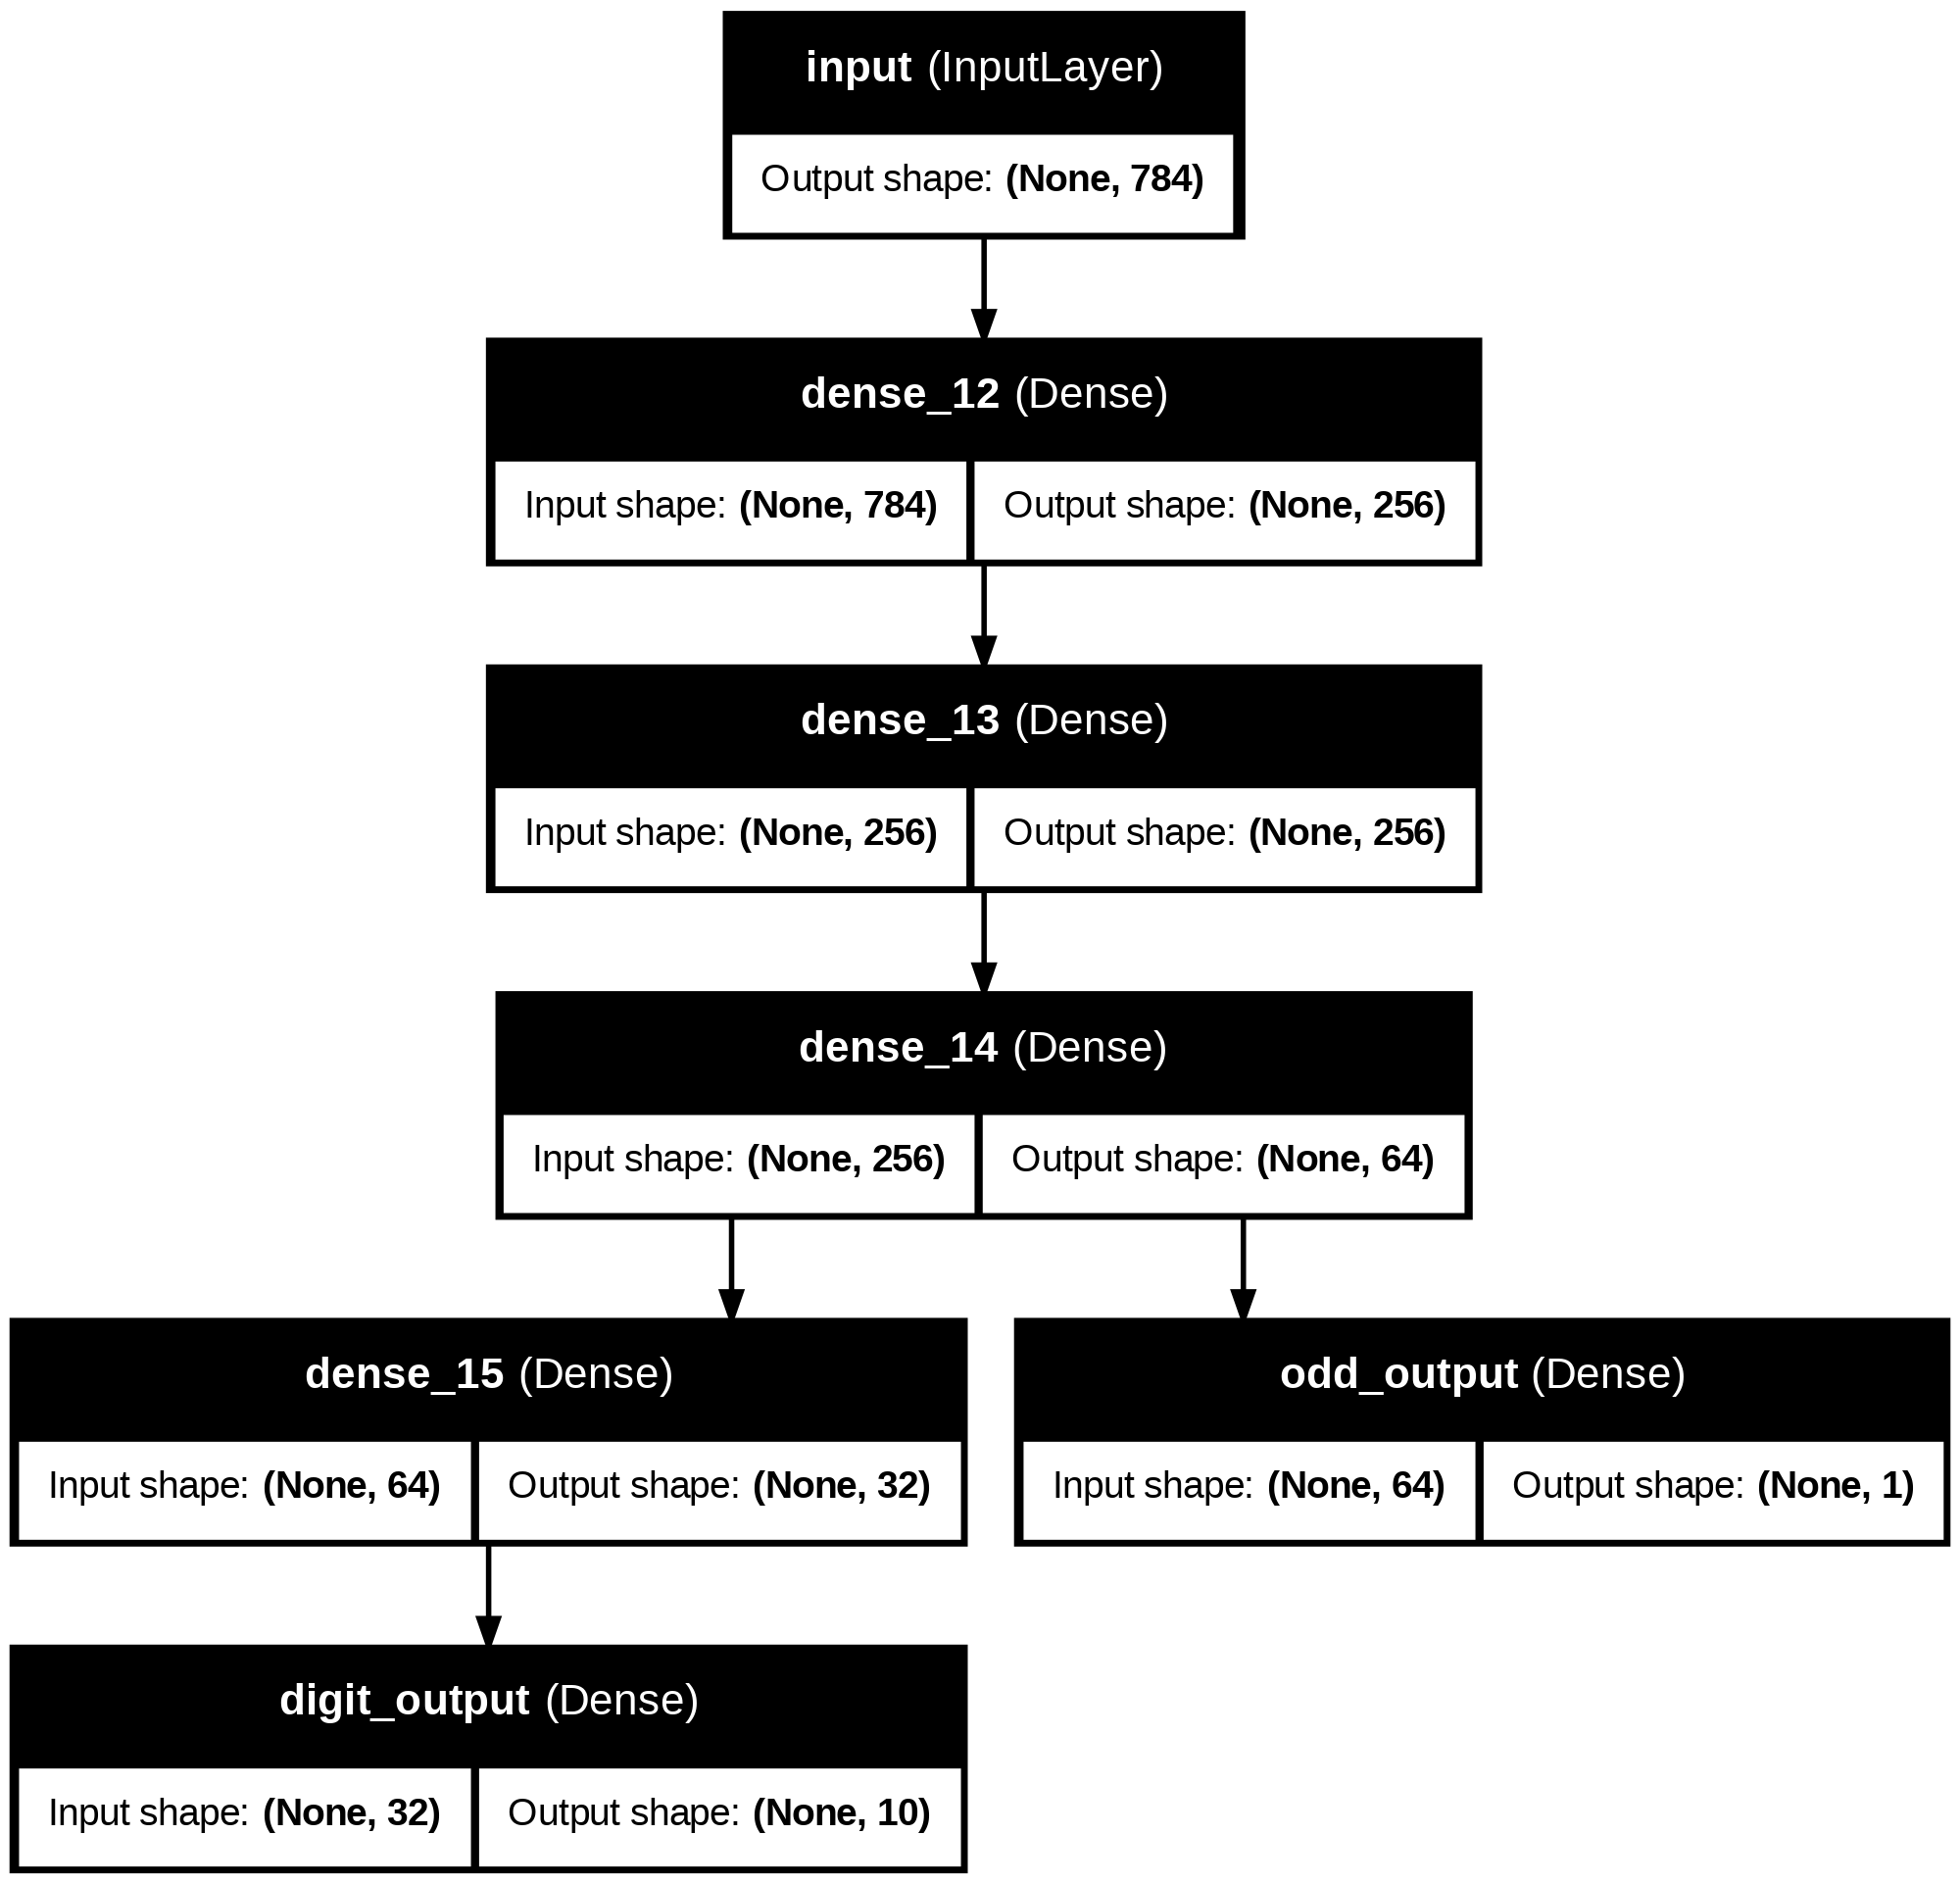

In [23]:
plot_model(multiout_m, show_shapes=True, show_layer_names=True, to_file='multiout_model.png')

In [24]:
# 모델 컴파일
multiout_m.compile(optimizer='adam',
                    loss={'odd_output': 'binary_crossentropy', 'digit_output': 'sparse_categorical_crossentropy'},
                    loss_weights={'odd_output': 0.5, 'digit_output': 0.5},
                    metrics={'odd_output': 'acc', 'digit_output': 'acc'})

# 모델 훈련
history_multi = multiout_m.fit({'input': x_train}, {'odd_output': y_train_new, 'digit_output': y_train},
                    validation_data=({'input': x_test}, {'odd_output': y_test_new, 'digit_output': y_test}),
                    epochs=20)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - digit_output_acc: 0.8680 - loss: 0.2896 - odd_output_acc: 0.9373 - val_digit_output_acc: 0.9672 - val_loss: 0.0788 - val_odd_output_acc: 0.9831
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - digit_output_acc: 0.9700 - loss: 0.0720 - odd_output_acc: 0.9849 - val_digit_output_acc: 0.9713 - val_loss: 0.0713 - val_odd_output_acc: 0.9853
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - digit_output_acc: 0.9798 - loss: 0.0476 - odd_output_acc: 0.9904 - val_digit_output_acc: 0.9730 - val_loss: 0.0610 - val_odd_output_acc: 0.9862
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - digit_output_acc: 0.9850 - loss: 0.0357 - odd_output_acc: 0.9933 - val_digit_output_acc: 0.9759 - val_loss: 0.0592 - val_odd_output_acc: 0.9885
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - digit_output_acc: 0.9866 - loss: 0.0300 - odd_output_acc: 0.9939 - val_digit_output_acc: 0.9775 - val_loss: 0.0568 - val_odd_output_acc: 0.9891

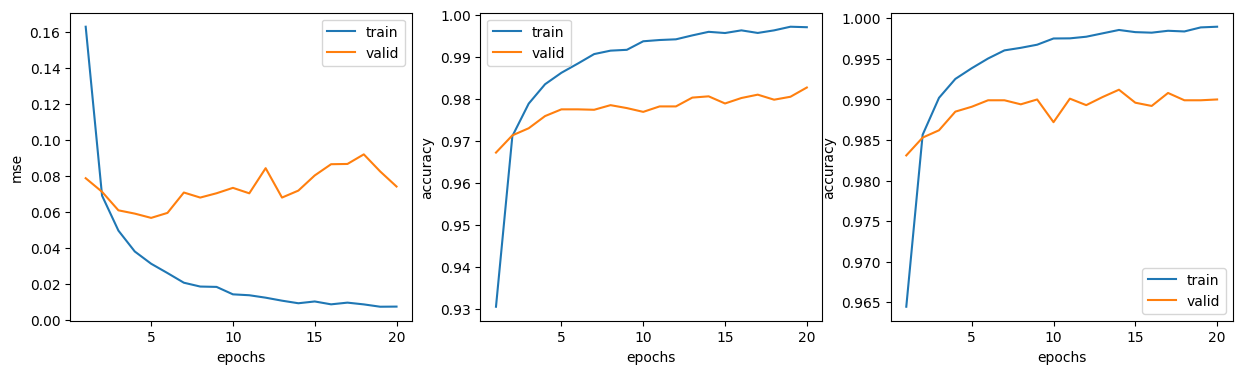

In [25]:
# history (로그 시각화)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes[0].plot(range(1, 21),
         history_multi.history['loss'][0:20],
         label='train')
axes[0].plot(range(1, 21),
         history_multi.history['val_loss'][0:20],
         label='valid')
axes[0].set_xlabel('epochs')
axes[0].set_ylabel('mse')
axes[0].legend()

axes[1].plot(range(1, 21),
         history_multi.history['digit_output_acc'][0:20],
         label='train')
axes[1].plot(range(1, 21),
         history_multi.history['val_digit_output_acc'][0:20],
         label='valid')
axes[1].set_xlabel('epochs')
axes[1].set_ylabel('accuracy')
axes[1].legend()

axes[2].plot(range(1, 21),
         history_multi.history['odd_output_acc'][0:20],
         label='train')
axes[2].plot(range(1, 21),
         history_multi.history['val_odd_output_acc'][0:20],
         label='valid')
axes[2].set_xlabel('epochs')
axes[2].set_ylabel('accuracy')
axes[2].legend()

plt.show()